In [1]:
% matplotlib inline
import numpy
import math
import matplotlib.pyplot as plt

In [2]:
def Heaviside(x):
    H = numpy.zeros(len(x))
    for i in range(len(x)):
        if x[i] < 0.:
            H[i] = 0.
        else:
            H[i] = 1.
    return H

Consider a ramp strain loading followed by a ramp unloading on a material that is best described by the Standard Linear Solid model.

----
Set material parameters:

In [88]:
E0 = 100. # MPa
E1 = 100. # MPa
eta = 100. # MPa*s

tau_eps = eta/E0
tau_sig = eta*(E0+E1)/(E0*E1)
ER = E1

Set load parameters:

In [137]:
t2 = 2. # s
v = 0.5/t2 # s^-1


dt = t2/50.
t = numpy.arange(0., 3.*t2, dt)

Come up with two stress loads that, added together, create the desired profile.

In [138]:
eps1 =  v*t - v*(t-t2)*Heaviside(t-t2)
eps2 = -v*(t-t2)*Heaviside(t-t2)
eps = eps1 + eps2

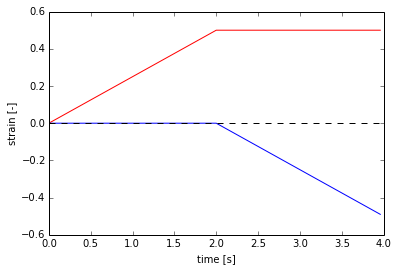

In [139]:
plt.figure()
plt.plot(t,eps1,'r-')
plt.plot(t,eps2,'b-')
plt.plot([0.,2.*t2],[0.,0.],'k--')
plt.xlabel('time [s]')
plt.ylabel('strain [-]')

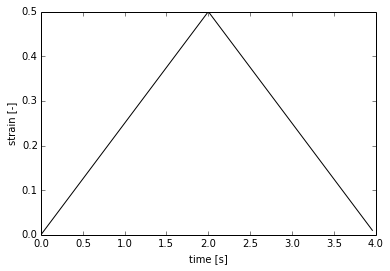

In [140]:
plt.figure()
plt.plot(t,eps,'k-')
plt.plot([0.,2.*t2],[0.,0.],'k--')
plt.xlabel('time [s]')
plt.ylabel('strain [-]')

Considering the loads separately, find their creep response.

In [141]:
sig1 = numpy.zeros(len(t))
sig2 = numpy.zeros(len(t))

c = v*(ER*(t2 + (tau_sig - tau_eps)*(1. - math.exp(-t2/tau_eps))) - E1*t2)/(math.exp(-t2/tau_eps))

for i in range(len(t)):
    if t[i] <= t2: 
        sig1[i] = ER*v*(t[i] + (tau_sig - tau_eps)*(1. - math.exp(-t[i]/tau_eps)))
    else: 
        sig1[i] = c*math.exp(-(t[i])/tau_eps) + E1*v*t2
        sig2[i] = ER*v*(-(t[i]-t2) - (tau_sig - tau_eps)*(1. - math.exp(-(t[i]-t2)/tau_eps)))

sig = sig1 + sig2

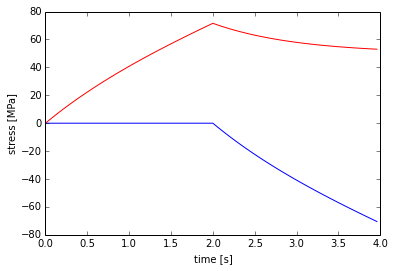

In [142]:
plt.figure()
plt.plot(t,sig1,'r-')
plt.plot(t,sig2,'b-')
plt.xlabel('time [s]')
plt.ylabel('stress [MPa]')
# plt.axis([150., 250., 45., 55.])

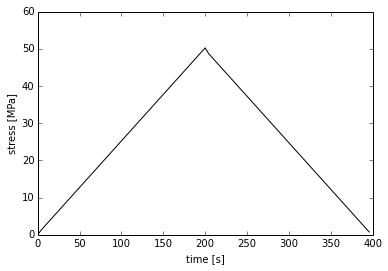

In [125]:
plt.figure()
plt.plot(t,sig,'k-')
plt.xlabel('time [s]')
plt.ylabel('stress [MPa]')

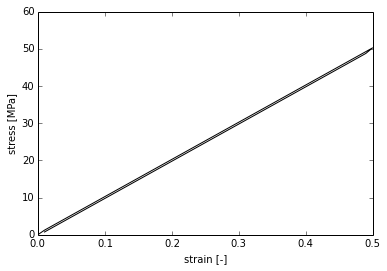

In [126]:
plt.figure()
plt.plot(eps,sig,'k-')
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')